## Pytorch Workflow

end-to-end workflow

In [1]:
what_were_covering = {1: "data(prepare and load)",
                     2: "build model",
                     3: "fitting the model to data(training)",
                     4: "making predictions and evaluating a model (inference)",
                     5: "saving and loading a model",
                     6: "putting it all together"}

what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'1.13.1'

## 1. Data (Preparing and loading)

Data can be almost anything... in machine laerning

* Excel spreadsheet
* Images of any kind
* Videos (YouTubes has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get Data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

*known* data using the linear regression formula.

**parameters**

In [3]:
# *known* parameters

weight = 0.7
bias = 0.3

# data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Spliting data into training and test sets

Three Datasets
1. Training set - 패턴 배우기 70
2. Validation set - 모의고사 -> 모델 선택 15 // not always
3. Test set - unseen data 15

for **Gerneralization**

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?
This is where the data explorer's motto comes in!


In [8]:
def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions

    Args:
        train_data (_type_, optional): _description_. Defaults to X_train.
        train_label (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to X_test.
        test_label (_type_, optional): _description_. Defaults to y_test.
        predictions (_type_, optional): _description_. Defaults to None.
    """
    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data, train_label, c='b',label='training data', s=4)

    #Plot test data in green
    plt.scatter(test_data, test_label, c='g', s=4, label='Testing data')

    #
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='predictons')
    
    plt.legend(prop={'size':14})
    plt.show()

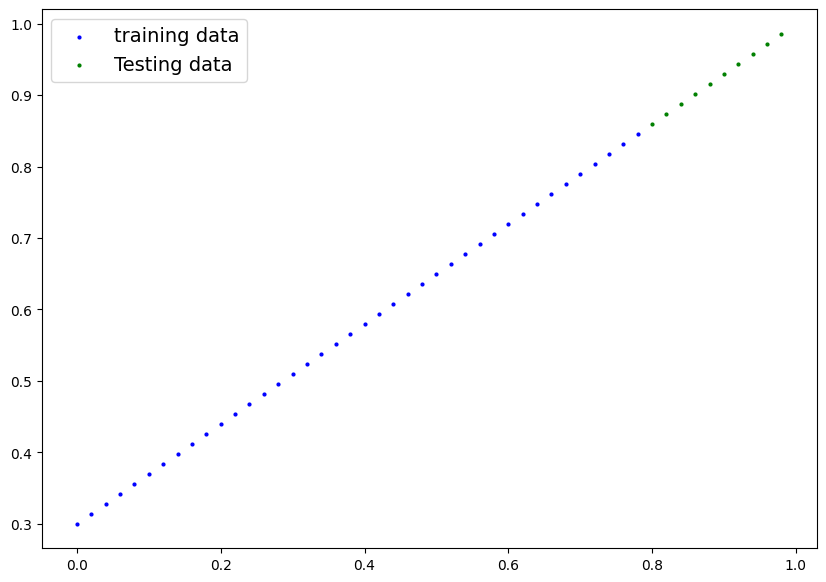

In [9]:
plot_predictions()

## 2. Build model

our first pytorch model

 What our model does:
 * Start with random values (weights & bias)
 * Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data)

 How does it do so?

 Through two main algorithms:
 1. Gradient Descent
 2. BackPropagation

In [10]:
# Create linear regression moel class
from torch import nn

class LinearRegressionModel(nn.Module):
    # almost everything in pytorch
    def __init__(self):
        super().__init__()
        # Start Random numbers
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

    

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational)
* torch.nn.Parameter - what parameters should  our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computations

### Checking thte contents of our PyTorch model

In [13]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

print(model_0)
print(model_0.parameters())
print(list(model_0.parameters()))


LinearRegressionModel()
<generator object Module.parameters at 0x7fc398a99a50>
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [14]:
# List name parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])